#### Question 1: Anova 
Three archers – Pat, Jack, and Alex are participating in an archery contest. They are shooting at targets with 10 evenly spaced concentric rings. The rings have score values from 1 through 10 assigned to them, with 10 being the highest. Each participant shoots 6 arrow, scoring the following points: Pat – 5, 4, 4, 3, 9, 4 Jack – 4, 8, 7, 5, 1, 5 Alex – 9, 9, 8, 10, 4, 10 Based on the above results we would like to know who the best archer is. In other words our null hypothesis is that the means of all populations are equal.

In [39]:
import pandas as pd

In [40]:
pat=[5, 4, 4, 3, 9, 4]
jack=[4, 8, 7, 5, 1, 5 ]
alex=[9, 9, 8, 10, 4, 10]

In [41]:
score=pat+jack+alex
print(score)

[5, 4, 4, 3, 9, 4, 4, 8, 7, 5, 1, 5, 9, 9, 8, 10, 4, 10]


In [42]:
company_names = (['pat'] * len(pat)) +  (['jack'] * len(jack)) +  (['alex'] * len(alex))
print(company_names)

['pat', 'pat', 'pat', 'pat', 'pat', 'pat', 'jack', 'jack', 'jack', 'jack', 'jack', 'jack', 'alex', 'alex', 'alex', 'alex', 'alex', 'alex']


In [43]:
data=pd.DataFrame({'name':company_names ,'score':score})
data

,name,score
0,pat,5
1,pat,4
2,pat,4
3,pat,3
4,pat,9
5,pat,4
6,jack,4
7,jack,8
8,jack,7
9,jack,5


In [44]:
data.groupby('name').mean()

,score
name,
alex,8.333333
jack,5.000000
pat,4.833333


In [45]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

##### anova one way table

In [46]:
lm = ols('score ~ name',data=data).fit()
table = sm.stats.anova_lm(lm)
table

,df,sum_sq,mean_sq,F,PR(>F)
name,2.0,46.777778,23.388889,4.488273,0.029668
Residual,15.0,78.166667,5.211111,NaN,NaN


In [47]:
pip install pingouin

Note: you may need to restart the kernel to use updated packages.


In [48]:
from pingouin import ancova

F = (ss_bw/ df_bw ) / (ss_within/ df_within)

In [49]:
# compute overall mean(Xbar G)
overall_mean = data['score'].mean()
print('overall_mean=',overall_mean)
# overall_mean

overall_mean= 6.055555555555555


In [50]:
# compute Sum of Squares Total (ss_between )
data['overall_mean'] = overall_mean
ss_total = sum((data['score'] - data['overall_mean'])**2)
print('ss_total(btwn)=',ss_total) #ss_between

ss_total(btwn)= 124.94444444444446


In [51]:
# compute group means
group_means = data.groupby('name').mean()
group_means = group_means.rename(columns = {'score': 'group_mean'})
group_means # Xbar 1 , Xbar 2 , Xbar 3

,group_mean,overall_mean
name,,
alex,8.333333,6.055556
jack,5.000000,6.055556
pat,4.833333,6.055556


In [52]:
# add group means and overall mean to the original data frame
data = data.merge(group_means, left_on = 'name', right_index = True)
data

,name,score,overall_mean_x,group_mean,overall_mean_y
0,pat,5,6.055556,4.833333,6.055556
1,pat,4,6.055556,4.833333,6.055556
2,pat,4,6.055556,4.833333,6.055556
3,pat,3,6.055556,4.833333,6.055556
4,pat,9,6.055556,4.833333,6.055556
5,pat,4,6.055556,4.833333,6.055556
6,jack,4,6.055556,5.000000,6.055556
7,jack,8,6.055556,5.000000,6.055556
8,jack,7,6.055556,5.000000,6.055556
9,jack,5,6.055556,5.000000,6.055556


In [53]:
# compute Sum of Squares Residual
ss_residual = sum((data['score'] - data['group_mean'])**2)
print('ss_residual (within)=',ss_residual) # ss_within where Xi1 is score here

ss_residual (within)= 78.16666666666666


In [54]:
# compute Sum of Squares Model
ss_explained = sum((data['group_mean'] - data['overall_mean_x'])**2)
print('ss_explained(between)=',ss_explained) 
# ss_between where overall mean is XbarG and group mean is Xbar1(mean of Pat),...Xbar3(mean of Alex)

ss_explained(between)= 46.77777777777779


MS within

In [55]:
# compute Mean Square Residual
n_groups = len(set(data['name'])) # K
n_obs = data.shape[0] # N 
df_residual = n_obs - n_groups # df_within
ms_residual = ss_residual / df_residual # MS_within = ss_within / df_within
print('ms_residual(within)=',ms_residual)

ms_residual(within)= 5.21111111111111


MS between

In [56]:
#compute Mean Square Explained
df_explained = n_groups - 1 # df_bw
ms_explained = ss_explained / df_explained # MS_bw = ss_bw / df_bw
print('ms_explained(between)=',ms_explained)

ms_explained(between)= 23.388888888888896


In [57]:
# compute F-Value
f = ms_explained / ms_residual  # F = MS_bw / MS_within  or  F = (ss_bw/ df_bw ) / (ss_within/ df_within)
f

4.488272921108744

In [58]:
# compute p-value
import scipy.stats
p_value = 1 - scipy.stats.f.cdf(f, df_explained, df_residual)
p_value

0.029667763955533277

In [59]:
critical_value=scipy.stats.f.ppf(1-0.05,df_explained,df_residual)
critical_value

3.6823203436732412

##### critical value is 3.68 and less than the f value 4.48

##### p_value =0.02 which less than the 0.05 and hence we reject the null hypothesis

In [60]:
import seaborn as sns 
import matplotlib.pyplot as plt

AxesSubplot(0.125,0.125;0.775x0.755)


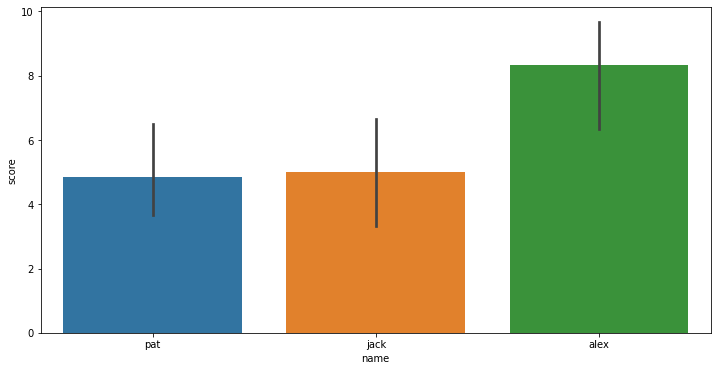

In [61]:
plt.figure(figsize=(12,6))
print(sns.barplot(x='name',y='score',data=data))